<a href="https://colab.research.google.com/github/JaoSaraiva/-Engenhando-com-Dados/blob/main/deteccao_de_fraude_ML_engjao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Construção de pipeline completo do processo de detecção de fraude trabalhando com um Storytelling de um banco onde está ocorrendo muitos casos de fraudes.
#Utilizando o simulador de dados financeiros PaySim já que não podemos ter acesso verídico a um banco de dados de uma financeira. Como estamos limitados à quantidades de dados
#dentro do colab, vamos pegar uma fração desses dados na base do kaggle chamada Fraud Detection Example.

In [59]:
import pandas as pd

In [60]:
df = pd.read_csv("/content/fraud_dataset_example.csv")
df

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

In [61]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [62]:
#manipulação de colunas
df = df[['isFraud', 'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

In [63]:
#renomeando colunas
colunas = {'isFraud': 'fraude',
           'isFlaggedFraud': 'super_fraude',
           'step': 'tempo',
           'type': 'tipo',
           'amount': 'valor',
           'nameOrig': 'cliente1',
           'oldbalanceOrg': 'saldo_inicial_c1',
           'newbalanceOrig': 'novo_saldo_c1',
           'nameDest': 'cliente2',
           'oldbalanceDest': 'saldo_inicial_c2',
           'newbalanceDest': 'novo_saldo_c2'}

df = df.rename(columns=colunas)
df.head()

fraude  super_fraude  tempo      tipo     valor     cliente1  \
0       0             0      1   PAYMENT   9839.64  C1231006815   
1       0             0      1   PAYMENT   1864.28  C1666544295   
2       1             0      1  TRANSFER    181.00  C1305486145   
3       1             0      1  CASH_OUT    181.00   C840083671   
4       0             0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [64]:
df.describe()

fraude  super_fraude          tempo         valor  \
count  101613.000000      101613.0  101613.000000  1.016130e+05   
mean        0.001142           0.0       8.523457  1.740901e+05   
std         0.033768           0.0       1.820681  3.450199e+05   
min         0.000000           0.0       1.000000  3.200000e-01   
25%         0.000000           0.0       8.000000  1.001659e+04   
50%         0.000000           0.0       9.000000  5.338541e+04   
75%         0.000000           0.0      10.000000  2.124984e+05   
max         1.000000           0.0      10.000000  1.000000e+07   

       saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05   1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05   9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06   2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04   0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05   2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07   3.894623e+07      3.400874e+07   3.894623e+07

count = rows, não vamos precisar fazer o tratamento de dados nulos.

In [65]:
#trocando as linhas pelas colunas para melhor visualização dos dados
df.describe().T

count          mean           std   min       25%  \
fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
super_fraude      101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                       50%         75%          max  
fraude                0.00        0.00         1.00  
super_fraude          0.00        0.00         0.00  
tempo                 9.00       10.00        10.00  
valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [67]:
#fazendo a verificação da variável target
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

provavelemente o número de fraudes no df seja de 116.

In [68]:
#embora saibamos que não temos valores nulos, vamos verificar de forma mais acertiva qualquer (any) valor que possa corresponder a isto em todo o df
df.isnull().values.any()

False

In [69]:
print(df.columns)

Index(['fraude', 'super_fraude', 'tempo', 'tipo', 'valor', 'cliente1',
       'saldo_inicial_c1', 'novo_saldo_c1', 'cliente2', 'saldo_inicial_c2',
       'novo_saldo_c2'],
      dtype='object')


In [70]:
#trocamos a variável tipo por números para melhor compreensão da máquina.
df = pd.get_dummies(data=df, columns=['tipo'], dtype=int)
df.head()

fraude  super_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0       0             0      1   9839.64  C1231006815          170136.0   
1       0             0      1   1864.28  C1666544295           21249.0   
2       1             0      1    181.00  C1305486145             181.0   
3       1             0      1    181.00   C840083671             181.0   
4       0             0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0             0   
1       19384.72  M2044282225               0.0            0.0             0   
2           0.00   C553264065               0.0            0.0             0   
3           0.00    C38997010           21182.0            0.0             0   
4       29885.86  M1230701703               0.0            0.0             0   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

In [71]:
#removendo as colunas que a partir das análises não são significativas para nosso projeto.
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1) #axis=1 para remover nas colunas

In [72]:
df.head()

fraude  tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0       0      1   9839.64          170136.0      160296.36               0.0   
1       0      1   1864.28           21249.0       19384.72               0.0   
2       1      1    181.00             181.0           0.00               0.0   
3       1      1    181.00             181.0           0.00           21182.0   
4       0      1  11668.14           41554.0       29885.86               0.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0            0.0             0              0           0             1   
1            0.0             0              0           0             1   
2            0.0             0              0           0             0   
3            0.0             0              1           0             0   
4            0.0             0              0           0             1   

   tipo_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0

#Aplicando o primeiro modelo de ML: Regressão Logística

In [73]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
SEED = 42 #seed para reprodutibilidade em qualquer máquina pode ser qualquer número
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [77]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

#métricas
print('Acurárica: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))

Acurárica:  0.9989765391276965
Precisão:  0.2
Recall:  0.043478260869565216
F1:  0.07142857142857142


Observamos que o nosso modelo não é tão eficiente apesar da acurácia alta, as outras métricas estão deixando à desejar. Vamos analisar através de uma Matriz de Confusão:

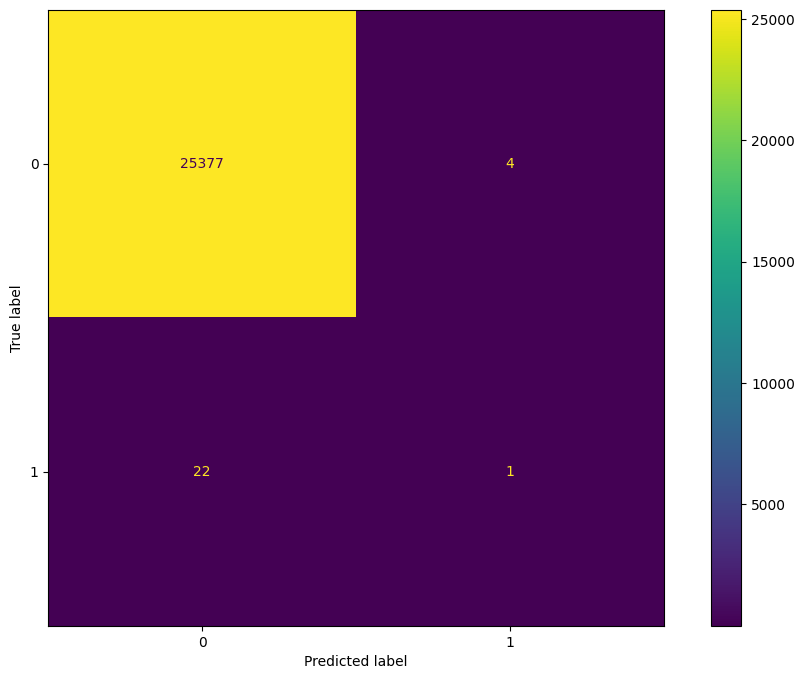

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
# matplotlib fazer e rodar dentro da nossa própria célula e proporcionar melhor visualização

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

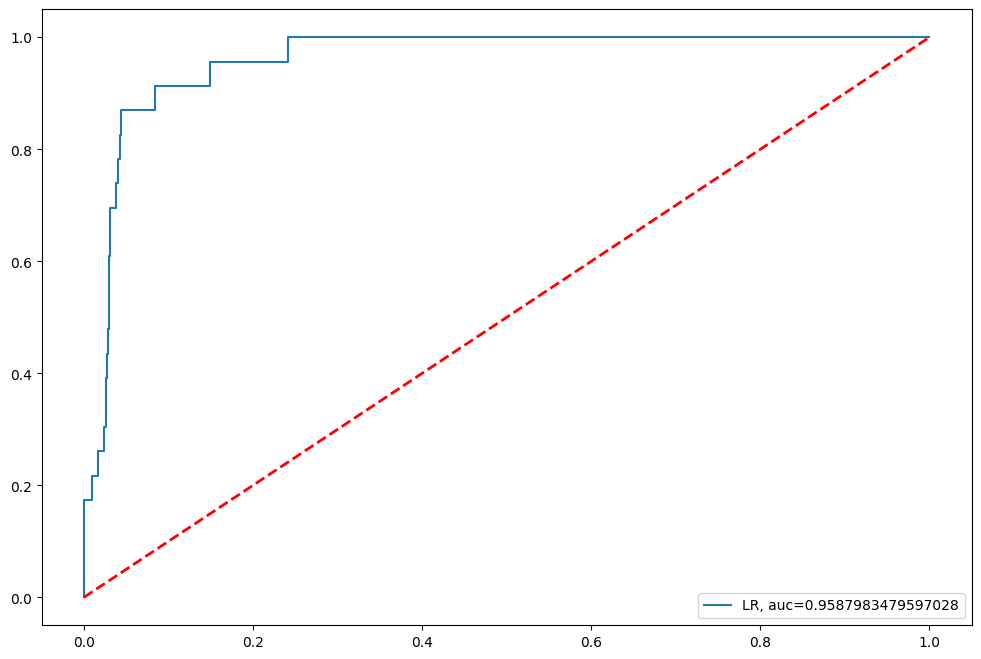

In [79]:
#Vamos fazer outra avaliação do nosso modelo com a métrica Curca Roc: quanto mais próxima de 1 a curva azul temos melhores resultados e conseguiremos uma melhor avaliação.
#Vamos trazer outra métrica junto, a AUC: área sobre a curva.
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Com esta visualização, precisamos buscar uma melhora no nosso modelo a partir de um balanceamento das nossa variáveis pois observamos que elas estão bem discrepantes: só temos 116 dados de fraude. Vamos tomar essa atitude até mesmo para podermos obter um melhoramento dos outros modelos que podem estar por vir.
Vamos fazer balanceamentos: UNDERSAMPLING e OVERSAMPLING.
No UNDER reduziríamos os dados de não fraude para 116.
No OVER copiar os dados de fraude (classe minoritária) até chegar no valor de não fraude (classe majoritária que possui mais dados).
Vamos utilizar o OVER por estarmos trabalhando com dados sintéticos. Mas, não é recomendado se estivéssemos com um df real de uma financeira.
Vamos utilizar a técnica SMOTE (Algoritmo KNN) uma forma de driblar um pouco esses valores fictícios.

In [80]:
pip install -U imbalanced-learn

In [81]:
from imblearn.over_sampling import SMOTE
import numpy as np

In [82]:
SEED = 42
smote = SMOTE(random_state=SEED)

In [83]:
X = df.drop('fraude', axis=1)
y = df['fraude']

In [84]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [85]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000             0              0   
1               0.000000       0.000000             0              0   
2               0.000000       0.000000             0              0   
3           21182.000000       0.000000             0              1   
4               0.000000       0.000000             0              0   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000             0              0   
202990          0.000000       0.000000             0              0   
202991       1945.589357    9370.603471             0              0   
202992          0.000000       0.000000             0              0   
202993          0.000000       0.000000             0              0   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

In [86]:
#verificando se ele preencheu as linhas da coluna 'fraude' certinhas
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

Variáveis balanceadas, vamos retomar ao novo teste do LR.

In [87]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [88]:
from sklearn.model_selection import train_test_split

SEED=42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))

Acurácia:  0.9417722516699837
Precisão:  0.9241993556945234
Recall:  0.9623125493291239
F1:  0.9428709521507975


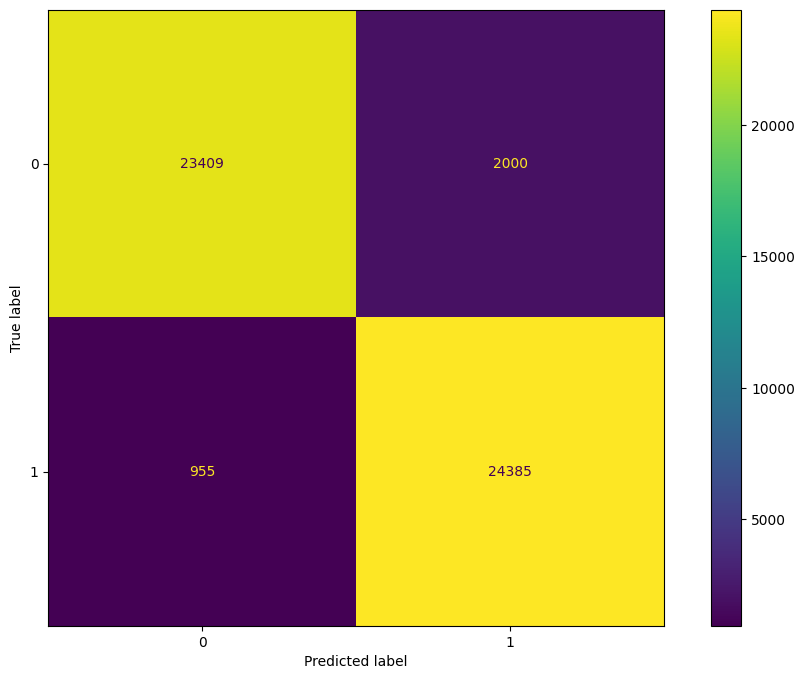

In [90]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

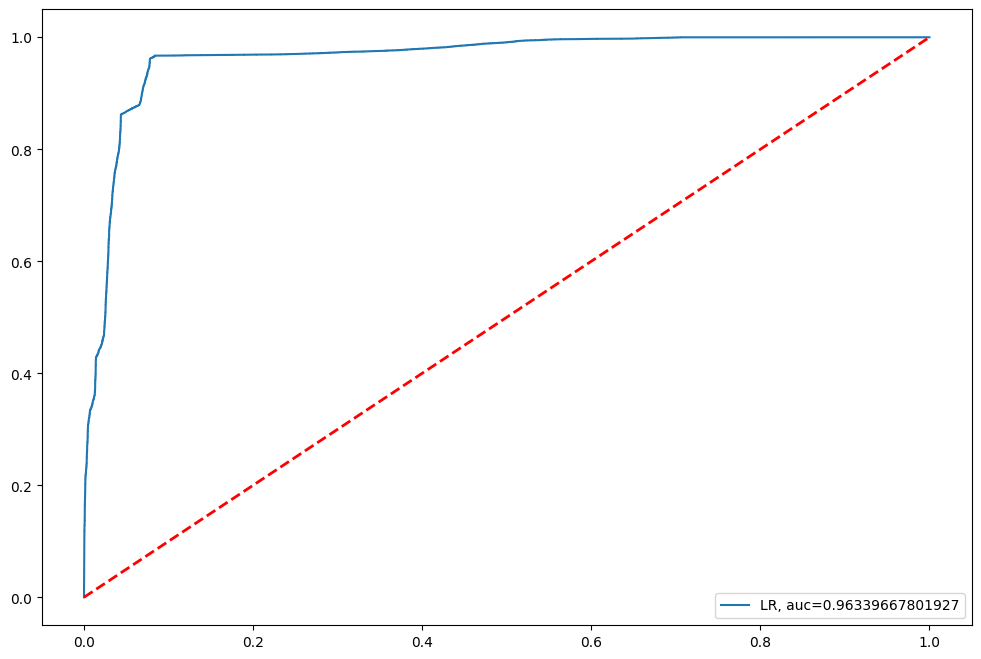

In [91]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

A intensão na curva Roc é ela ficar bem suave. Observamos que neste novo teste ela está seguindo esta linha.

Vamos analisar as variáveis correlacionadas com a fraude para podermos tirar hipóteses e aprimorar nosso modelo.

In [92]:
!pip install ydata-profiling

In [93]:
from ydata_profiling import ProfileReport

ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Hipóteses levantadas:
- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- o cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada

- O cliente paga as duas contas no começo do mês e houve uma novimentação no final do mês, sendo uma fraude.

Com estas hipóteses conseguimos trazer um storytelling para apresentar ao cliente.

#Aplicando o segundo modelo de ML: Árvore de Decisão

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt = DecisionTreeClassifier(max_depth = 5, random_state=SEED)

In [96]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print('Acurácia:' , metrics.accuracy_score(y_test, y_pred))
print('Precisão:' , metrics.precision_score(y_test, y_pred))
print('Recall:' , metrics.recall_score(y_test, y_pred))
print('F1:' , metrics.f1_score(y_test, y_pred))

Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943


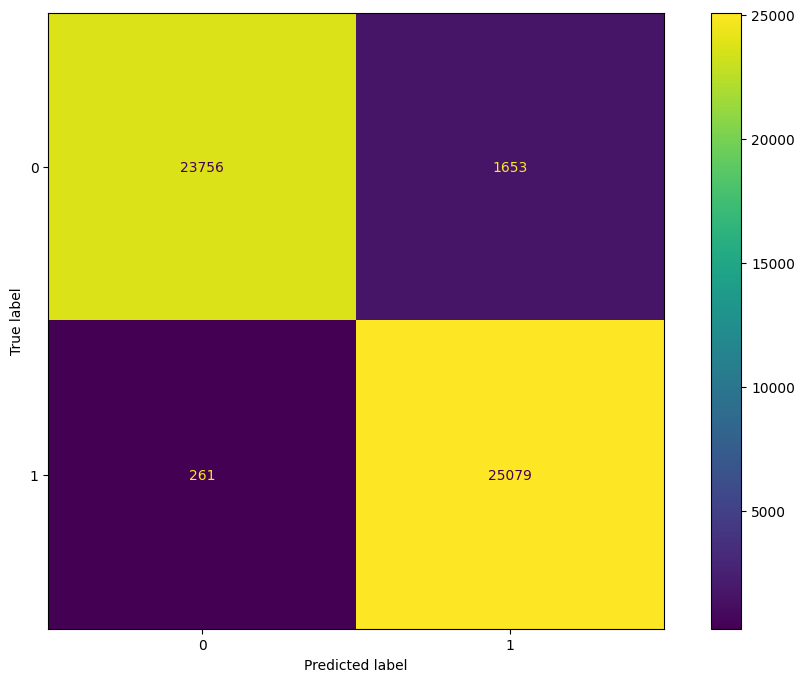

In [97]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

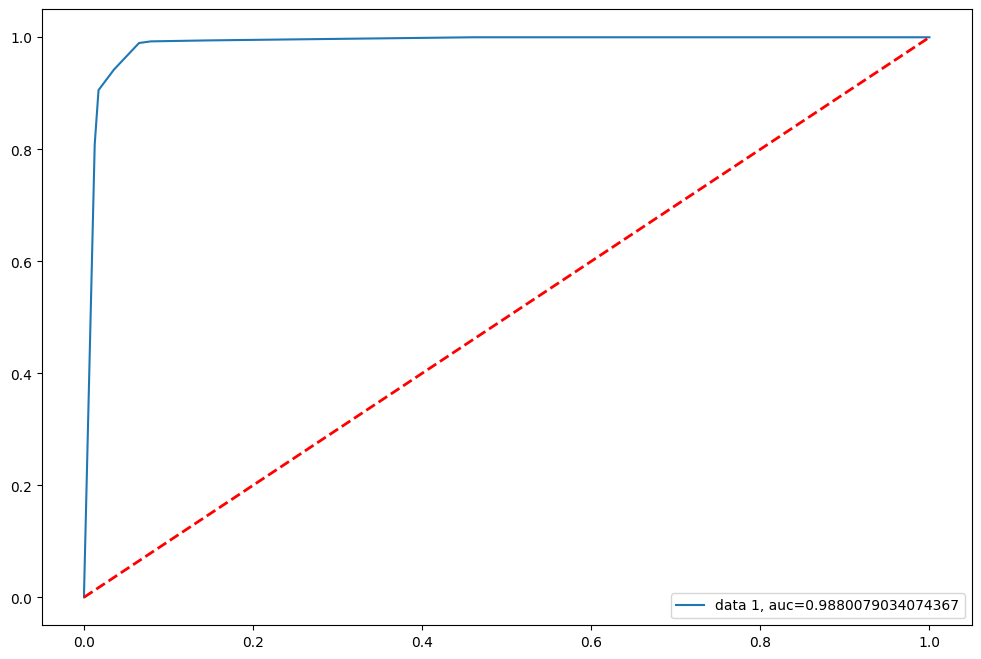

In [98]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

#Aplicando o terceiro modelo de ML: Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(max_depth=5, random_state=SEED, n_estimators=100)

In [101]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Acurácia:' , metrics.accuracy_score(y_test, y_pred))
print('Precisão:' , metrics.precision_score(y_test, y_pred))
print('Recall:' , metrics.recall_score(y_test, y_pred))
print('F1:' , metrics.f1_score(y_test, y_pred))

Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


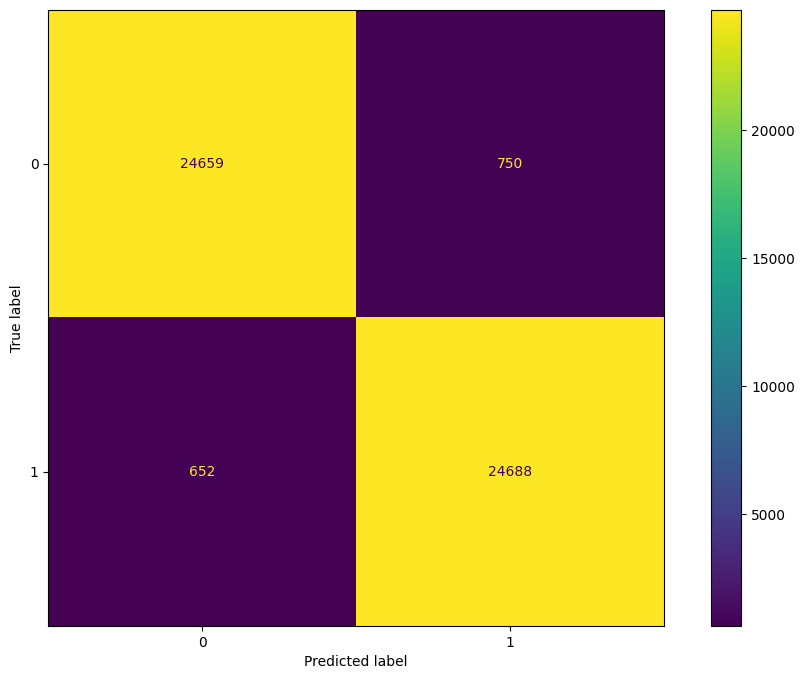

In [102]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

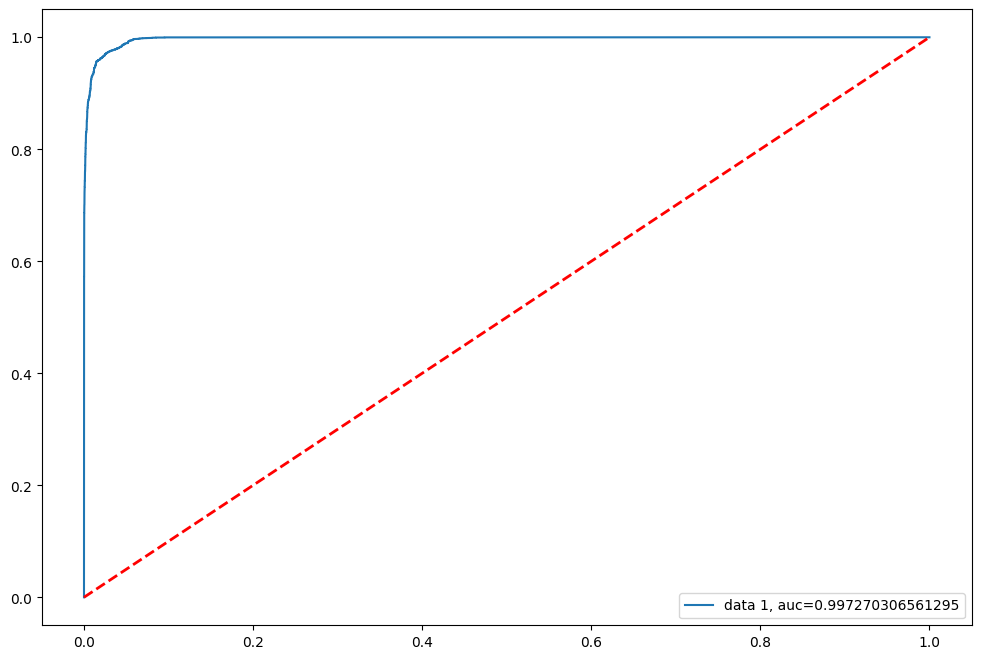

In [103]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

#Escolhendo o modelo: analisar as métricas, representar dentro do storytelling e montar o portfólio.

In [104]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=5, random_state=SEED),
    RandomForestClassifier(max_depth=5, random_state=SEED, n_estimators=100)]

LogisticRegression
****Resultados****
Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943
RandomForestClassifier
****Resultados****
Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


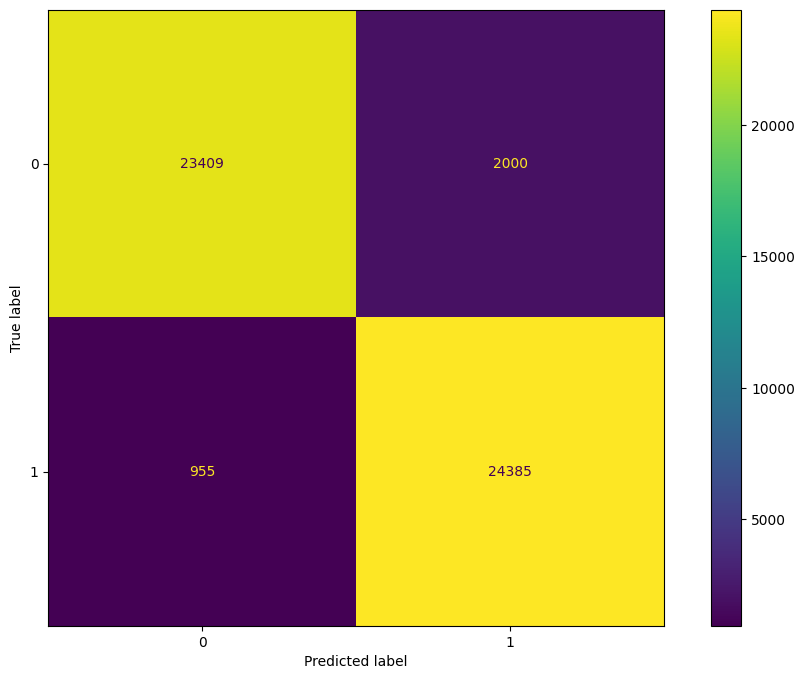

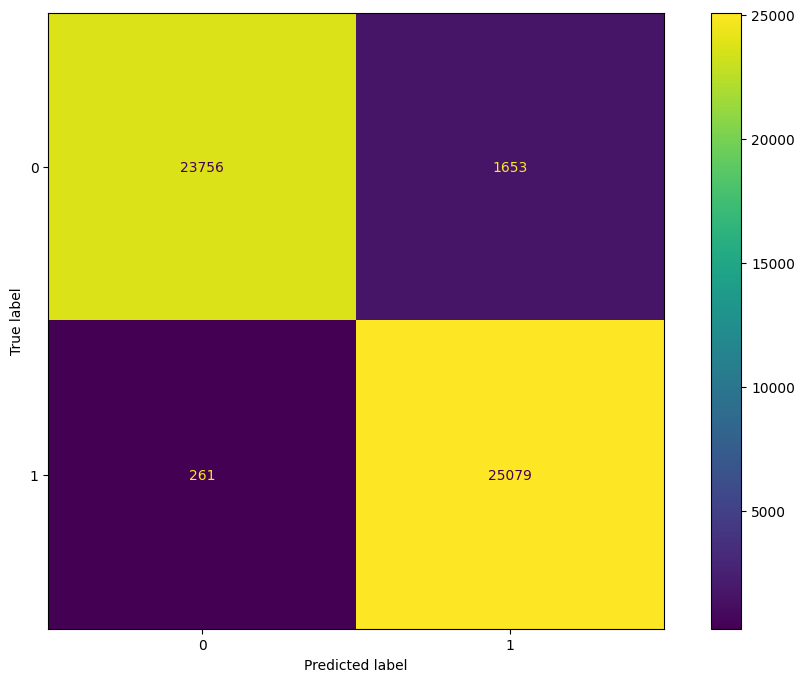

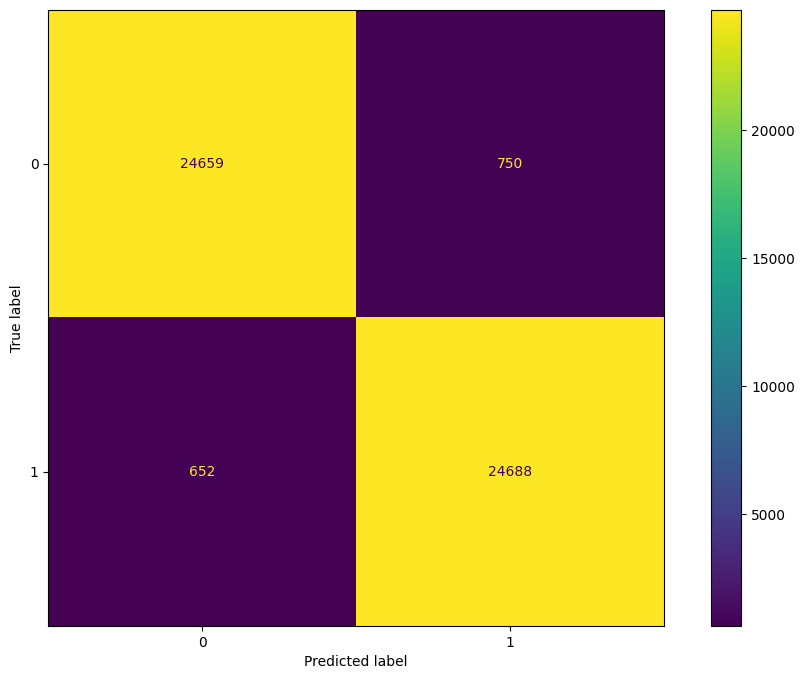

In [105]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print('Acurácia:' , metrics.accuracy_score(y_test, y_pred))
  print('Precisão:' , metrics.precision_score(y_test, y_pred))
  print('Recall:' , metrics.recall_score(y_test, y_pred))
  print('F1:' , metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

Após análises das métricas, o modelo escolhido foi o Random Forest. A partir do modelo escolhido, vamos fazer o melhoramento deste modelo usando o RANDOMIZEDSEARCHCV.

In [106]:
n_estimators = np.arange(20, 200, step=20)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [107]:
param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
SEED = 70
rforest = RandomForestClassifier(random_state=SEED)

In [110]:
random_cv = RandomizedSearchCV(
    rforest,
    param_grid,
    n_iter=5,
    cv=3,
    scoring='recall', #nas nossas análises a métrica que precisamos melhorar é a recall principalmente por se tratar de um caso de fraude
    n_jobs=-1,
    random_state=SEED
)

In [111]:
%%time
rcv = random_cv.fit(x,y)

CPU times: user 27.9 s, sys: 408 ms, total: 28.3 s
Wall time: 3min 20s


In [112]:
#parâmetros escolhidos para melhoramento do modelo na coluna 'params'
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      37.588201      1.709003         0.871876        0.053317   
1      13.640473      0.321918         0.555478        0.009095   
2      13.991092      0.394541         0.272588        0.006546   
3      27.272028      1.938847         1.065496        0.269428   
4      18.711002      0.520592         0.835877        0.290519   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.991665   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.914223   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.980285   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.993497   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999438           0.992817         0.994640        0.003425   
1           0.936009           0.862704         0.904312        0.030736   
2           1.000000           0.973812         0.984699        0.011138   
3           0.999025           0.992226         0.994916        0.002951   
4           0.943487           0.876537         0.911416        0.027404   

   rank_test_score  
0                2  
1                5  
2                3  
3                1  
4                4

In [113]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

Parâmetros escolhidos, vamos aplicá-los

In [115]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)
#colocando o modelo de treino e preditivo
model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

In [116]:
print('Acurácia:' , metrics.accuracy_score(y_test, y_pred))
print('Precisão:' , metrics.precision_score(y_test, y_pred))
print('Recall:' , metrics.recall_score(y_test, y_pred))
print('F1:' , metrics.f1_score(y_test, y_pred))

Acurácia: 0.9915860411042582
Precisão: 0.9906258615936036
Recall: 0.9925414364640884
F1: 0.9915827238857459


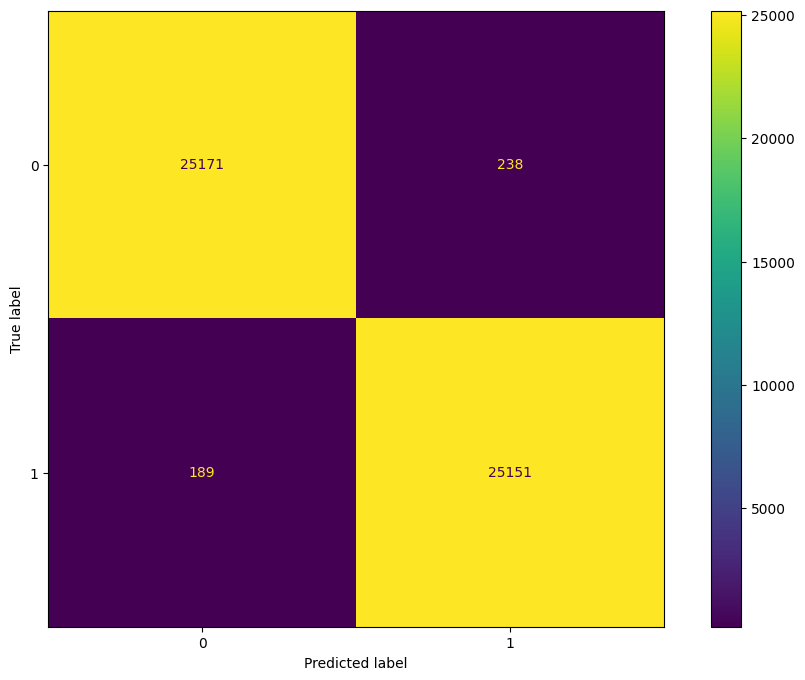

In [117]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Conclusão
##Possíveis soluções para as hipóteses:

*   O(a) cliente tem um certo padrão de movimentação do dinheiro, em horário comercial e a fraude ocorreu fora deste horário, como por exemplo durante a madrugada.

*   Ainda em relaçao ao tempo, o cliente pode fazer suas principais movimentações em um período inicial do mês e a fraude foi vista em um dia não habitual.

> Fazer um CAPTCHA para aumentar a segurança em horários não convencionais.

*  O(a) cliente utiliza como padrão o pagamento em dinheiro, seja por PIX ou retirada, e a fraude pode ocorrer por um pagamento por transferência.

>Solicitar uma verificação de informação adicional do banco, como uma pergunta de segurança, para movimentações de transferência.










